In [58]:
#Importing necessary Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.duplicated().sum()

0

In [8]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
#Drop unnecessary columns
data=data.drop(columns=['RowNumber','CustomerId','Surname'])

In [11]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [12]:
pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
#separate features and target
X=data.drop(columns=['Exited'])
y=data['Exited']

#split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [17]:
X_train.shape

(8000, 11)

In [18]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
#Standardize features
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [22]:
X_train_scaled

array([[ 1.34111823,  0.38693948, -1.73661451, ..., -0.57965968,
        -0.58042949, -1.08948952],
       [-1.4670728 , -0.57127623,  0.69033796, ..., -0.57965968,
        -0.58042949,  0.91786105],
       [-0.19155746, -1.62531351, -0.69649202, ..., -0.57965968,
        -0.58042949, -1.08948952],
       ...,
       [ 0.5079187 ,  1.44097676, -0.69649202, ...,  1.72515018,
        -0.58042949, -1.08948952],
       [-2.25912668, -0.76291937, -0.00307703, ..., -0.57965968,
        -0.58042949,  0.91786105],
       [-0.78816947,  1.05769048, -1.73661451, ..., -0.57965968,
         1.72286214,  0.91786105]])

In [29]:
#Initialize and train GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier(learning_rate=0.2, max_depth=5,n_estimators=100)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5)

In [33]:
#predict using the trained model
gb_pred=gb_model.predict(X_test)

print("Gradient Boosting Accuracy:",accuracy_score(y_test,gb_pred))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.8725
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1623
           1       0.73      0.51      0.60       377

    accuracy                           0.87      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



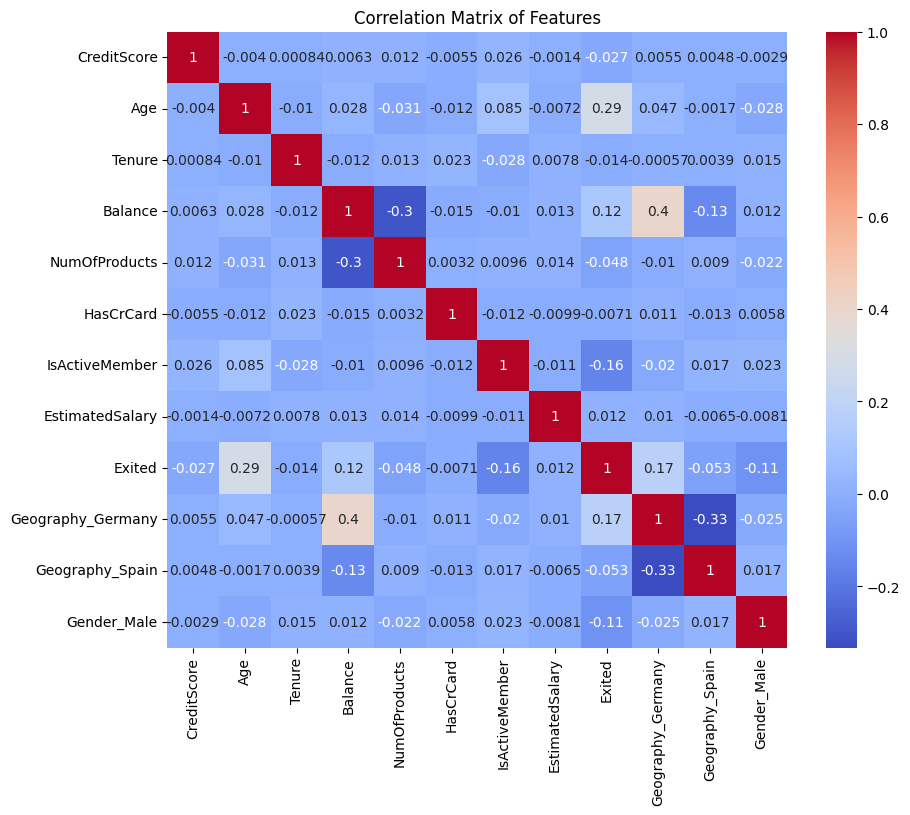

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',)
plt.title('Correlation Matrix of Features')
plt.show()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


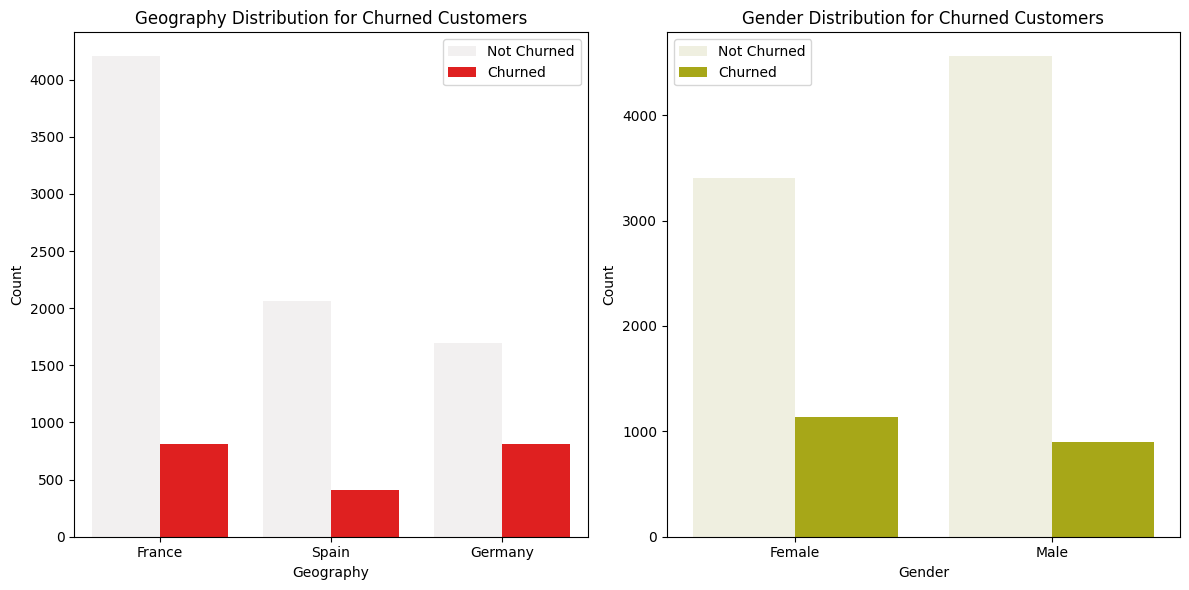

In [53]:


# Load the data
data = pd.read_csv("Churn_Modelling.csv")

# Verify column names
print(data.columns)
if 'Geography' in data.columns and 'Gender' in data.columns:
    # Drop unnecessary columns
    data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

    # Visualize the distribution of Geography and Gender for churned customers
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x='Geography', hue='Exited', data=data,color='red')
    plt.title('Geography Distribution for Churned Customers')
    plt.xlabel('Geography')
    plt.ylabel('Count')
    plt.legend(['Not Churned', 'Churned'])

    plt.subplot(1, 2, 2)
    sns.countplot(x='Gender', hue='Exited', data=data,color='y')
    plt.title('Gender Distribution for Churned Customers')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.legend(['Not Churned', 'Churned'])

    plt.tight_layout()
    plt.show()
else:
    print("Columns 'Geography' and/or 'Gender' not found.")


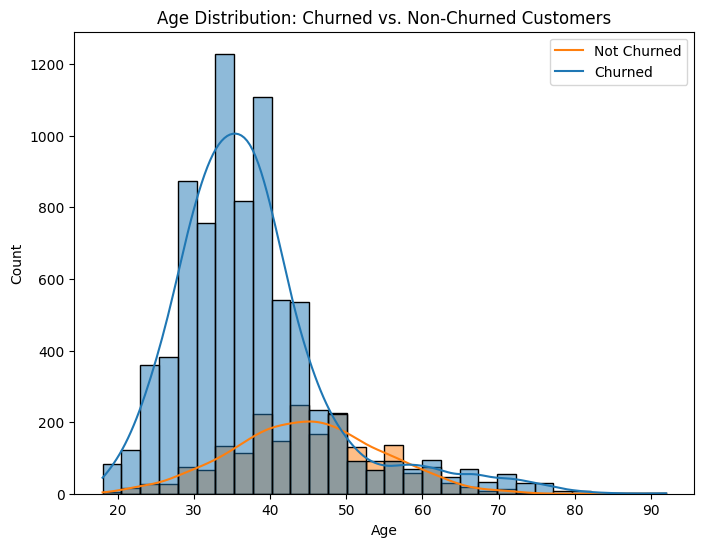

In [57]:
# Visualize the distribution of Age for churned and non-churned customers using a bar plot# Visualize the distribution of Age for churned and non-churned customers using histograms
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Age', hue='Exited', bins=30, kde=True)
plt.title('Age Distribution: Churned vs. Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Churned', 'Churned'])
plt.show()
